# 네트워크 커뮤니티 분석

In [1]:
import random
import networkx as nx

- Partitions


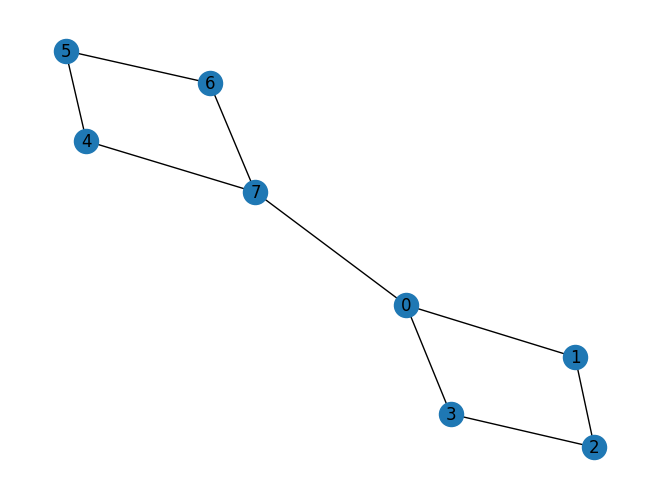

In [2]:
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

nx.draw(G, with_labels=True)

- 위 노드의 파티션 예

In [11]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [5]:
# partition = [
#     {0,1, 2, 3},
#     {4, 5, 6,7},
# ]

In [ ]:
# partition = [
#     {7,1, 2, 3},
#     {4, 5, 6,0},
# ]

- networkx 함수

In [12]:
nx.community.is_partition(G, partition)

True

- *partition map*: 노드 이름을 파티션 index에 맵핑하는 딕셔너리

In [13]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

- 딕셔너리의 key는 노드이름, 누 노드가 같은 파티션이면 같은 값을 갖음

In [14]:
partition_map[0] == partition_map[7]

True

- 시각화

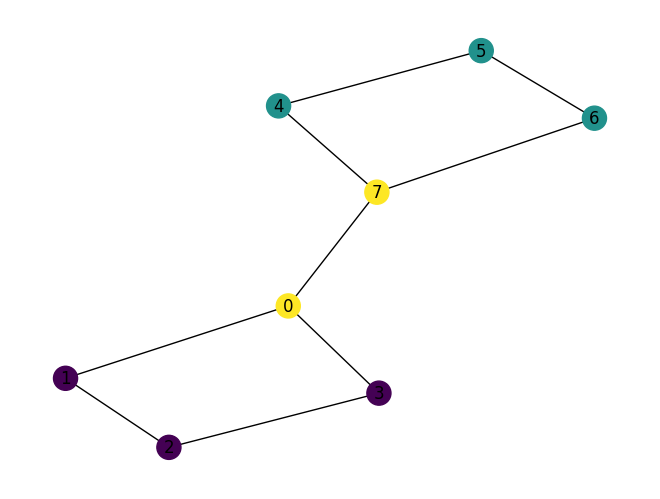

In [15]:
node_colors = [partition_map[n] for n in G.nodes]

nx.draw(G, node_color=node_colors, with_labels=True)

- Modularity

In [16]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]

In [17]:
nx.community.quality.modularity(G, partition_2)

0.38888888888888884

- Zachary's Karate Club 예

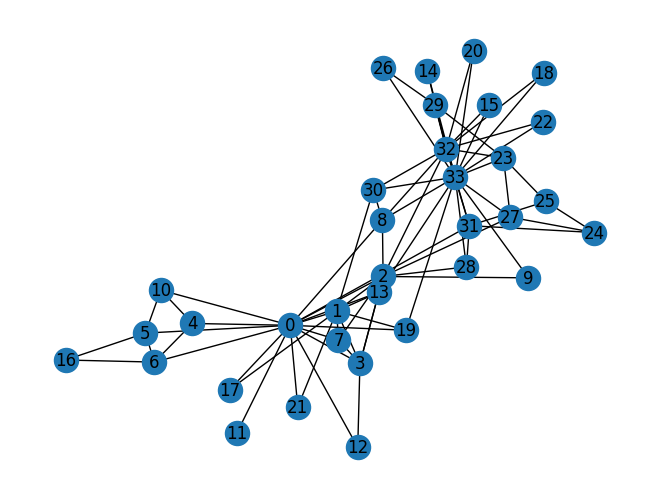

In [19]:
K = nx.karate_club_graph()
nx.draw(K, with_labels=True)

In [20]:
K.nodes[0]

{'club': 'Mr. Hi'}

In [21]:
K.nodes[9]

{'club': 'Officer'}

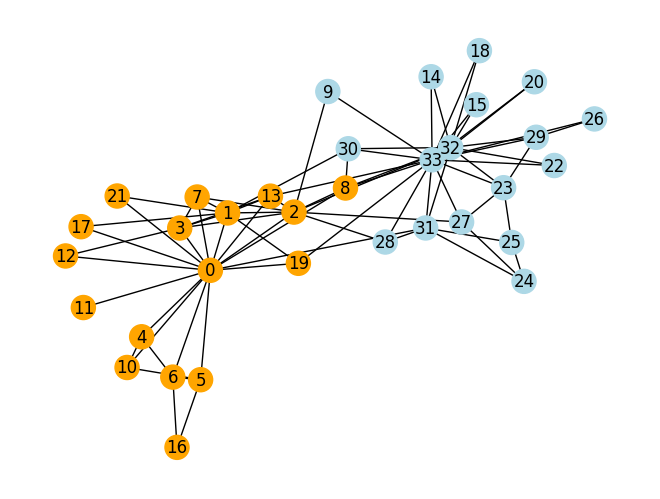

In [22]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)

In [23]:
groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in K.nodes:
    club = K.nodes[n]['club']
    groups[club].add(n)

groups

{'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 'Officer': {9,
  14,
  15,
  18,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}}

In [24]:
empirical_partition = list(groups.values())
empirical_partition

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 {9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [25]:
nx.community.is_partition(K, empirical_partition)

True

In [26]:
nx.community.quality.modularity(K, empirical_partition)

0.39143756676224206

- random partition과의 비교 (아래참고)

In [27]:
random_nodes = random.sample(K.nodes, 17)
random_partition = [set(random_nodes),
                    set(K.nodes) - set(random_nodes)]
random_partition

<ipython-input-27-30797258f1ab>:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(K.nodes, 17)


[{3, 5, 7, 8, 9, 10, 12, 13, 15, 21, 22, 24, 27, 28, 29, 31, 33},
 {0, 1, 2, 4, 6, 11, 14, 16, 17, 18, 19, 20, 23, 25, 26, 30, 32}]

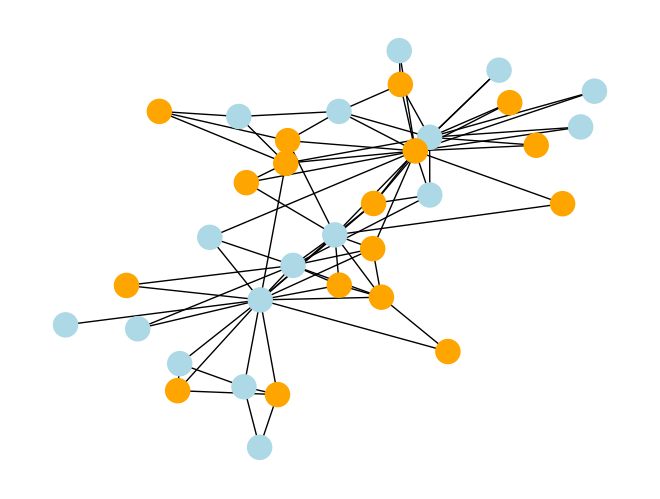

In [28]:
random_node_colors = ['orange' if n in random_nodes else 'lightblue' for n in K.nodes]
nx.draw(K, node_color=random_node_colors)

In [29]:
nx.community.quality.modularity(K, random_partition)

-0.03838009032814227